/Users/sherry/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Optimized model accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.64      0.64        55
           1       0.80      0.80      0.80        99

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



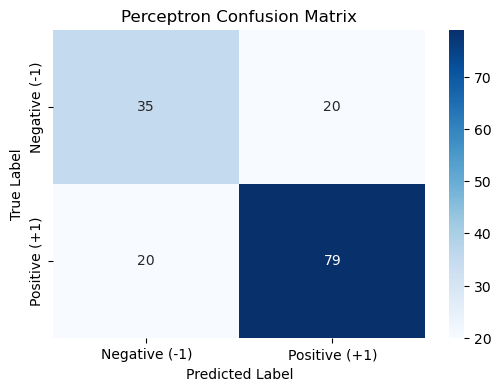

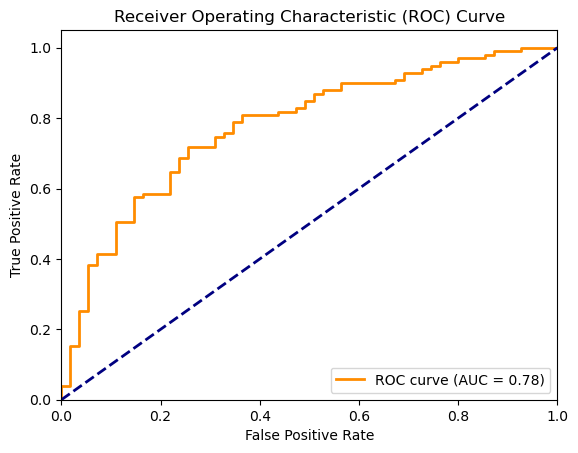

In [18]:
# THIS IS THE PERCEPTRON MODEL CODE WITH ROC CURVE

import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_data(filename):
    data = pd.read_csv(filename, sep=' ', header=None)
    labels = data[0]
    
    def parse_feature(value):
        if isinstance(value, str):
            return float(value.split(':')[1])
        return float(value)
    
    features = data.iloc[:, 1:].applymap(parse_feature)
    
    return features, labels

# Load data
X, y = load_data('diabetes_scale.txt')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for Perceptron
param_grid = {
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.001, 0.01, 0.1],
    'penalty': [None, 'l2', 'l1', 'elasticnet']
}

# Grid search
perceptron = Perceptron(random_state=42)
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Fit and predict
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized model accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (-1)', 'Positive (+1)'], yticklabels=['Negative (-1)', 'Positive (+1)'])
plt.title("Perceptron Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC curve
y_scores = best_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SVM model accuracy: 0.76

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.67      0.67        55
           1       0.82      0.81      0.81        99

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



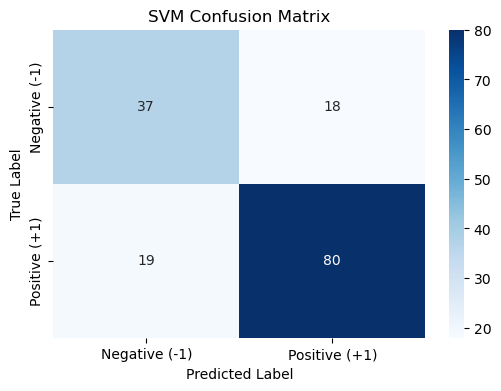

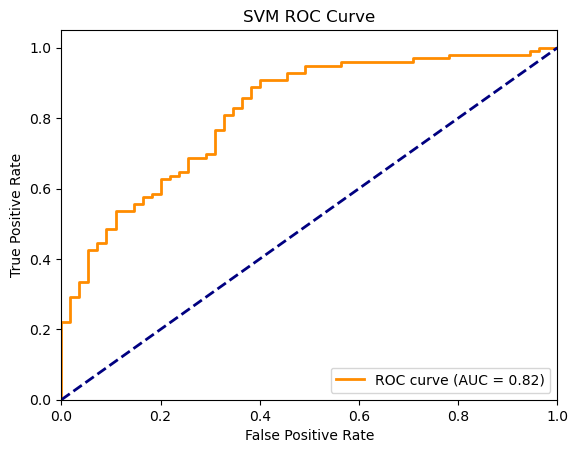

In [17]:
# THIS IS THE SVM MODEL CODE WITH ROC CURVE

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Use Support Vector Machine (SVM) for classification
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM model accuracy: {accuracy_svm:.2f}")

# Output classification report for the SVM model
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (-1)', 'Positive (+1)'], yticklabels=['Negative (-1)', 'Positive (+1)'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate ROC curve for SVM model
y_scores_svm = svm_model.decision_function(X_test_scaled)  # Get decision function scores
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm, pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM model
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()
